In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df = df.drop(columns=["id", "Unnamed: 32"])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [10]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled[:5]  #  sample of scaled features

array([[ 5.18558727e-01,  8.91825791e-01,  4.24631702e-01,
         3.83925436e-01, -9.74743706e-01, -6.89771505e-01,
        -6.88586446e-01, -3.98175254e-01, -1.03915470e+00,
        -8.25056321e-01, -1.09317755e-01, -5.59755400e-02,
        -2.10096206e-01, -1.59132582e-02, -1.00518399e+00,
        -9.11941990e-01, -6.62815884e-01, -6.52561081e-01,
        -7.01889114e-01, -2.75393571e-01,  5.79797697e-01,
         1.31324246e+00,  4.66908134e-01,  4.45982711e-01,
        -5.96154777e-01, -6.34722227e-01, -6.10227299e-01,
        -2.35743918e-01,  5.45663235e-02,  2.18367276e-02],
       [-5.16364088e-01, -1.63971029e+00, -5.41348716e-01,
        -5.42961327e-01,  4.76219058e-01, -6.31833818e-01,
        -6.04281166e-01, -3.03074908e-01,  5.21543093e-01,
        -4.54522896e-01, -6.04377961e-01, -1.00104604e+00,
        -5.85429002e-01, -4.93453793e-01,  4.03212009e-01,
        -7.68173276e-01, -4.79187222e-01,  1.14508478e-01,
        -1.42950761e-01, -5.77397732e-01, -5.82458953e-

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_curve, auc, RocCurveDisplay
)

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Training Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

In [18]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

NameError: name 'cm' is not defined

<Figure size 600x400 with 0 Axes>

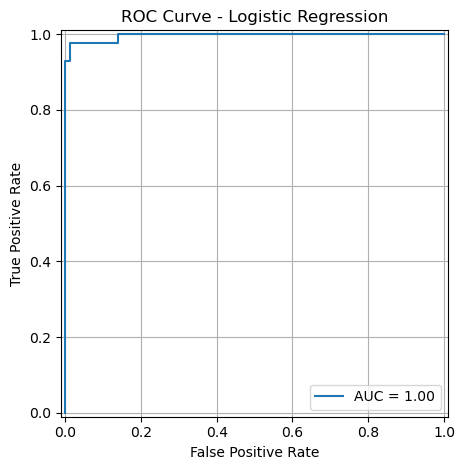

In [19]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.tight_layout()

(cm, precision, recall, roc_auc)

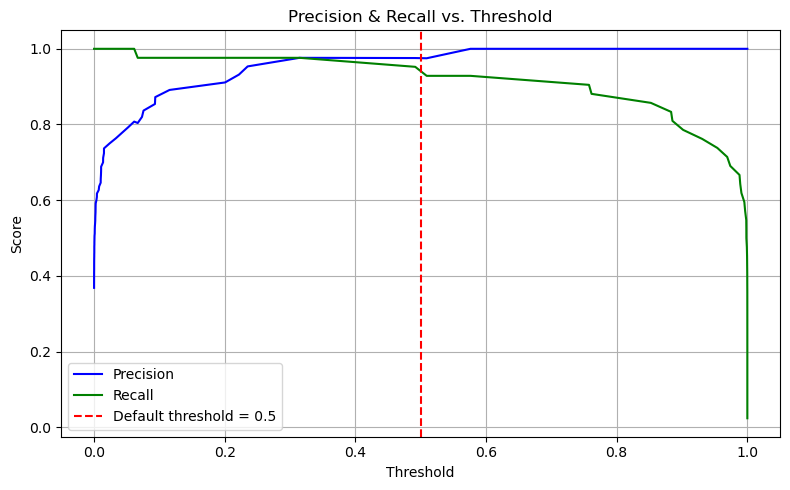

In [20]:
from sklearn.metrics import precision_recall_curve

# Getting precision, recall, and thresholds for various cutoff points
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision vs Recall vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.axvline(0.5, color="red", linestyle="--", label="Default threshold = 0.5")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
